In [3]:
### Import the libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
### display all the rows and columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [6]:
### Load the dataset
df=pd.read_csv("auto-mpg.csv")

In [7]:
### Shape
df.shape

(398, 9)

In [8]:
### datatypes
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [9]:
### Missing values??
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

There are no direct missing values

In [10]:
df.head()

mpg  cyl   disp   hp    wt   acc  yr  origin                   car name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino

In [11]:
df["hp"].value_counts()

hp
150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: count, dtype: int64

There are 6 ? in this dataset.
We need to replace ? with median

In [12]:
df["hp"]=df["hp"].replace("?",np.nan)
df["hp"]=df["hp"].astype(float)

In [13]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [14]:
df.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  392.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.469388  2970.424623   
std      7.815984    1.701004  104.269838   38.491160   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   75.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  126.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  398.000000  398.000000  398.000000  
mean    15.568090   76.010050    1.572864  
std      2.757689    3.697627    0.802055  
min      8.000000   70.000000    1.000000  
25%     13.825000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.175000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

In [15]:
df["hp"]=df["hp"].replace(np.nan,df["hp"].median())

In [16]:
df.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  398.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.304020  2970.424623   
std      7.815984    1.701004  104.269838   38.222625   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   76.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  398.000000  398.000000  398.000000  
mean    15.568090   76.010050    1.572864  
std      2.757689    3.697627    0.802055  
min      8.000000   70.000000    1.000000  
25%     13.825000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.175000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

In [17]:
### Change origin into catgoric->
df["origin"]=df["origin"].replace({1:"america",2:"europe",3:"asia"})

In [18]:
df.sample(10)

mpg  cyl   disp     hp    wt   acc  yr   origin  \
236  25.5    4  140.0   89.0  2755  15.8  77  america   
39   14.0    8  400.0  175.0  4464  11.5  71  america   
183  25.0    4  116.0   81.0  2220  16.9  76   europe   
362  24.2    6  146.0  120.0  2930  13.8  81     asia   
368  27.0    4  112.0   88.0  2640  18.6  82  america   
296  27.4    4  121.0   80.0  2670  15.0  79  america   
54   35.0    4   72.0   69.0  1613  18.0  71     asia   
341  23.5    6  173.0  110.0  2725  12.6  81  america   
334  23.7    3   70.0  100.0  2420  12.5  80     asia   
222  17.0    8  260.0  110.0  4060  19.0  77  america   

                       car name  
236         ford mustang ii 2+2  
39    pontiac catalina brougham  
183                   opel 1900  
362           datsun 810 maxima  
368    chevrolet cavalier wagon  
296               amc spirit dl  
54                  datsun 1200  
341          chevrolet citation  
334               mazda rx-7 gs  
222  oldsmobile cutlass supreme

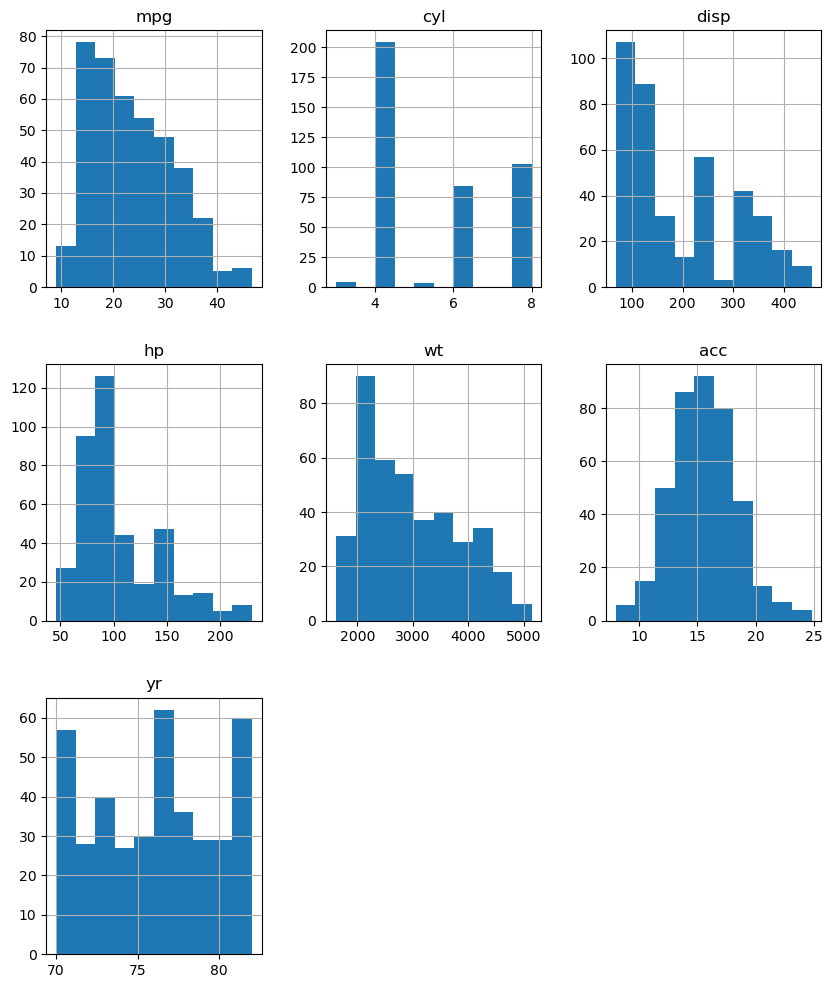

In [19]:
df.hist(figsize=(10,12))
plt.show()

In [20]:
df.skew(numeric_only=True)

mpg     0.457066
cyl     0.526922
disp    0.719645
hp      1.106224
wt      0.531063
acc     0.278777
yr      0.011535
dtype: float64

<Axes: xlabel='mpg'>

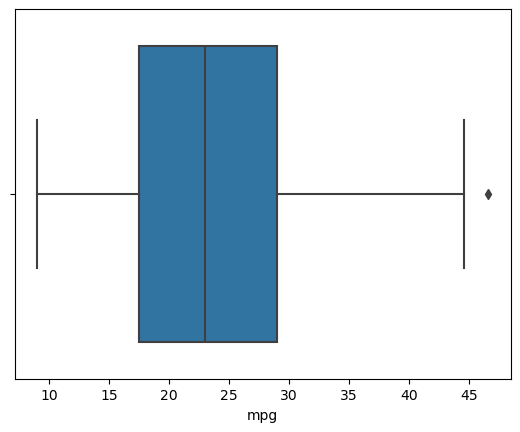

In [21]:
sns.boxplot(x="mpg",data=df)

<Axes: xlabel='cyl'>

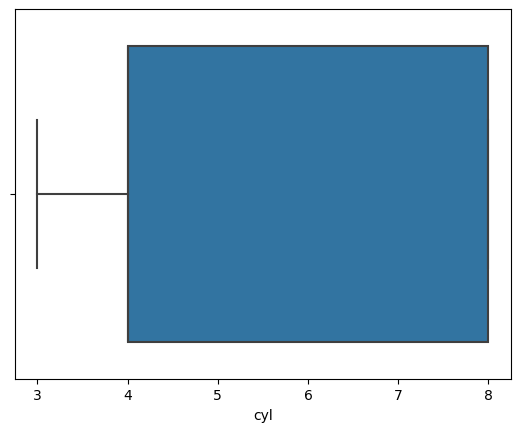

In [22]:
sns.boxplot(x="cyl",data=df)

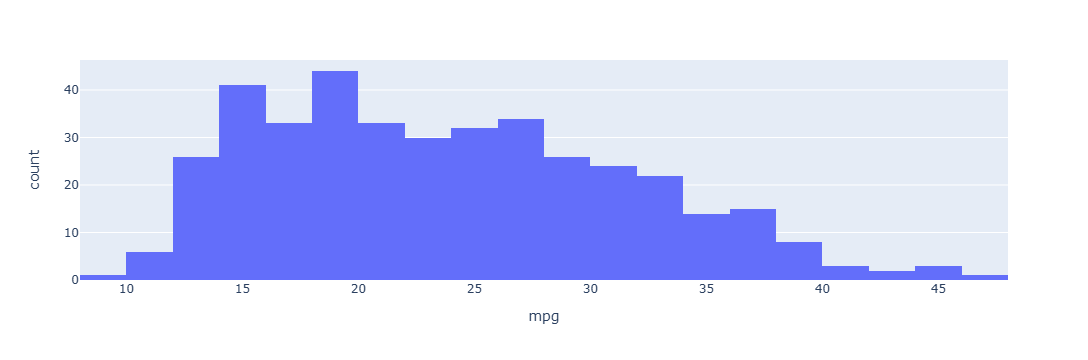

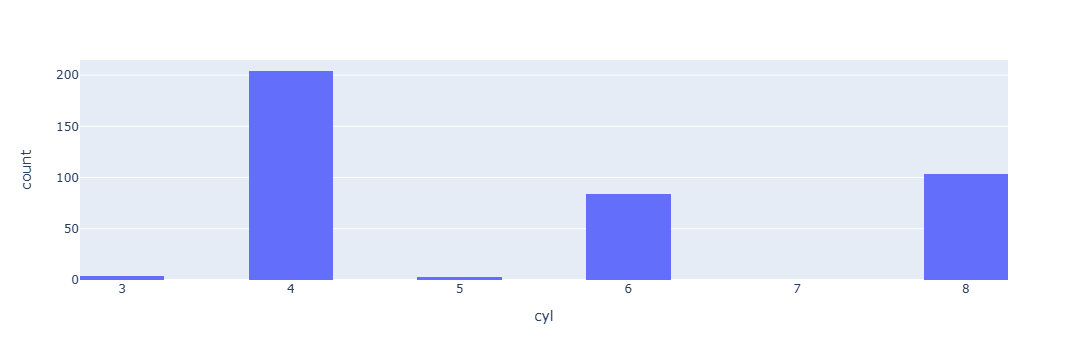

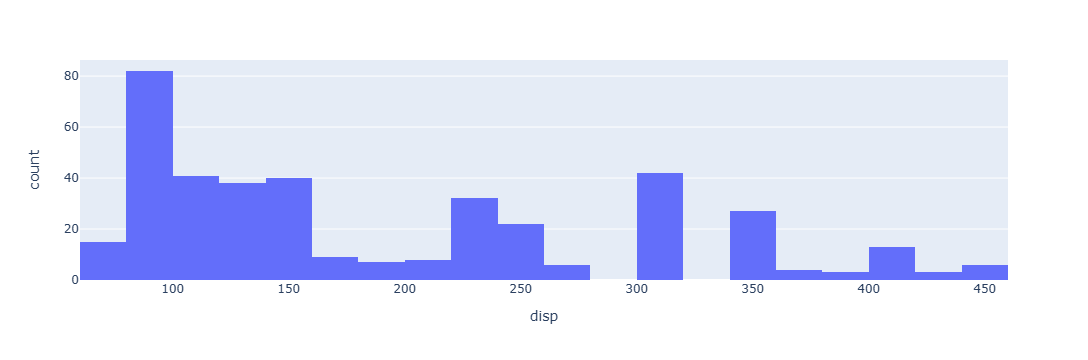

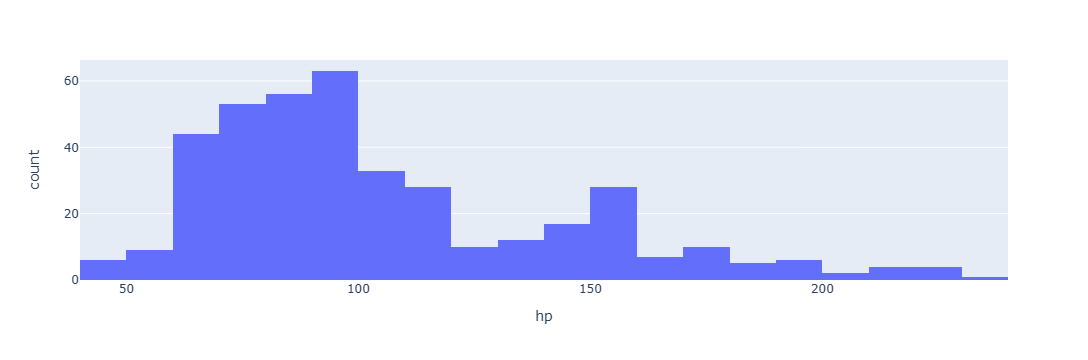

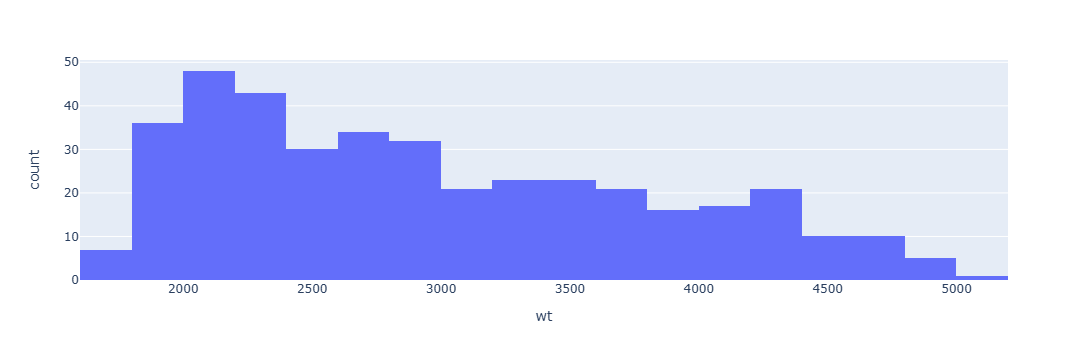

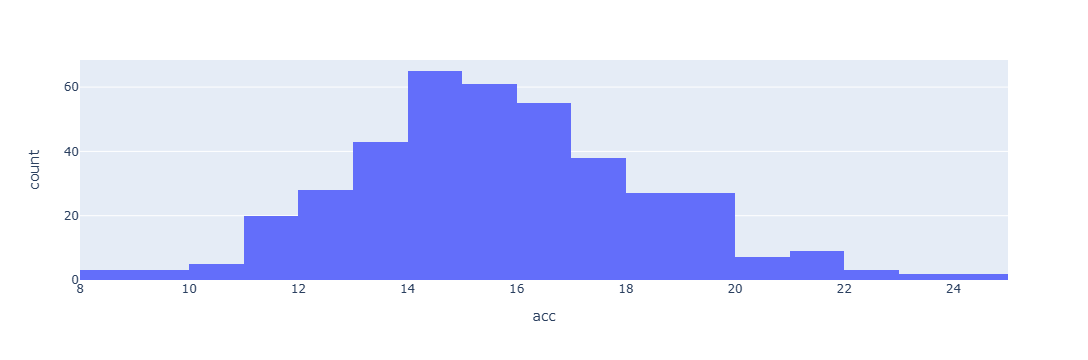

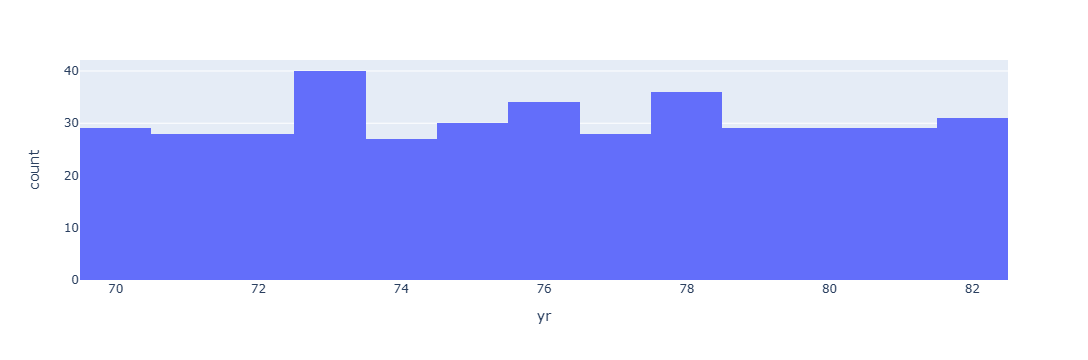

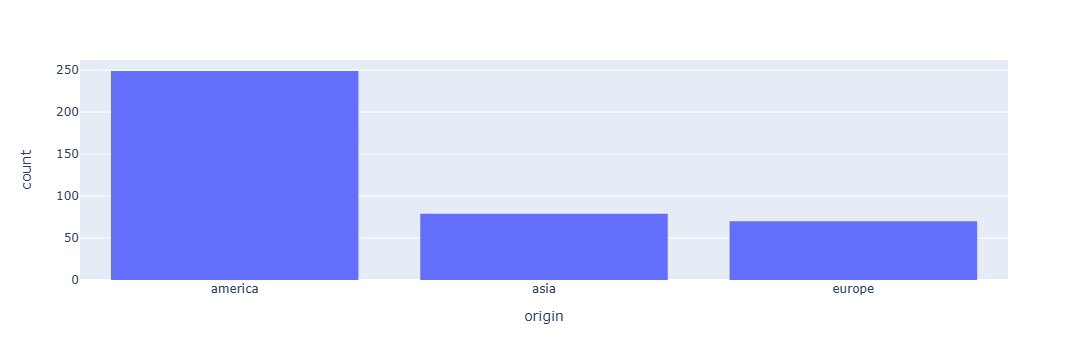

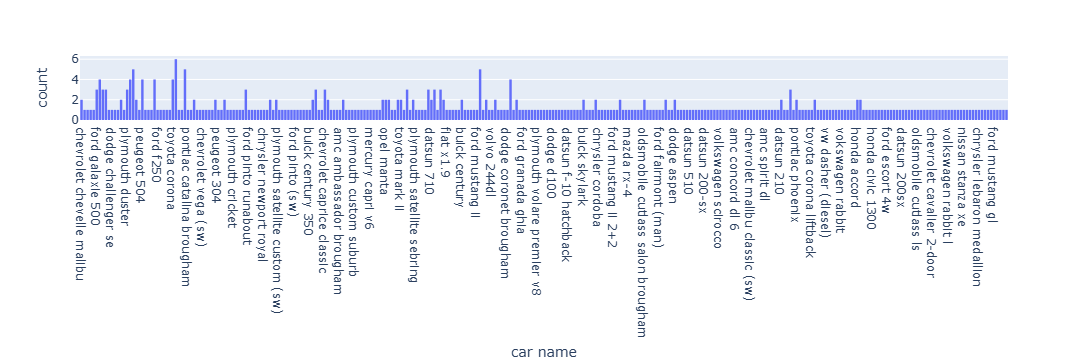

In [23]:
import plotly.express as px
for column in df:
    fig=px.histogram(df,x=column,nbins=20)
    fig.show()

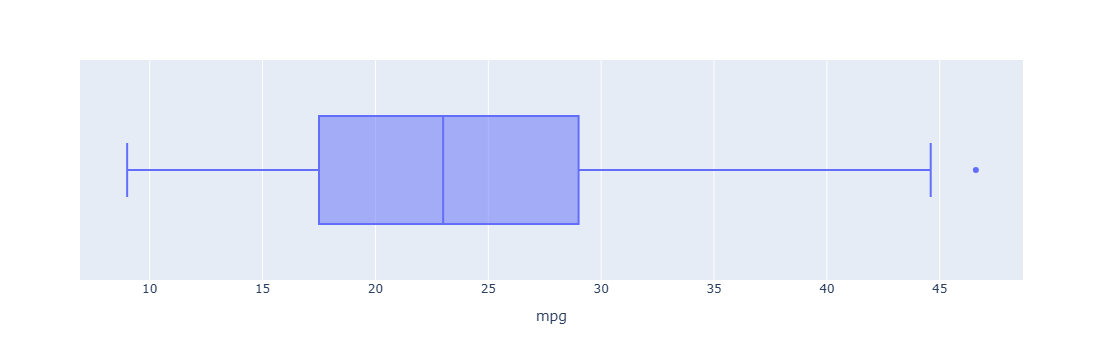

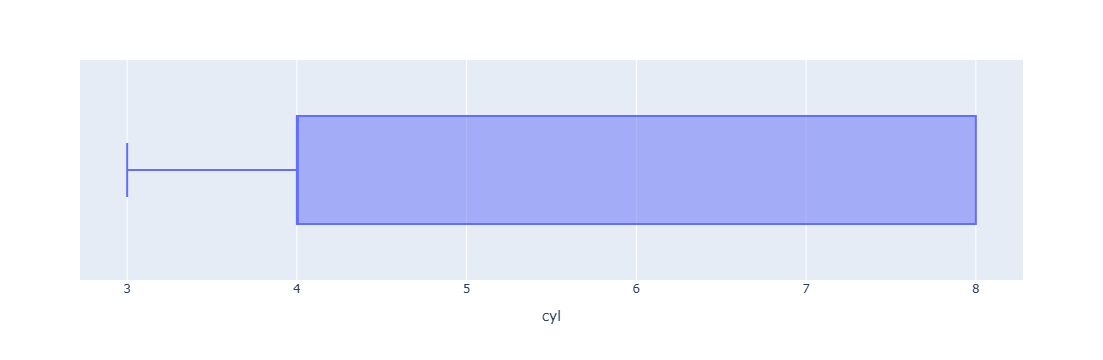

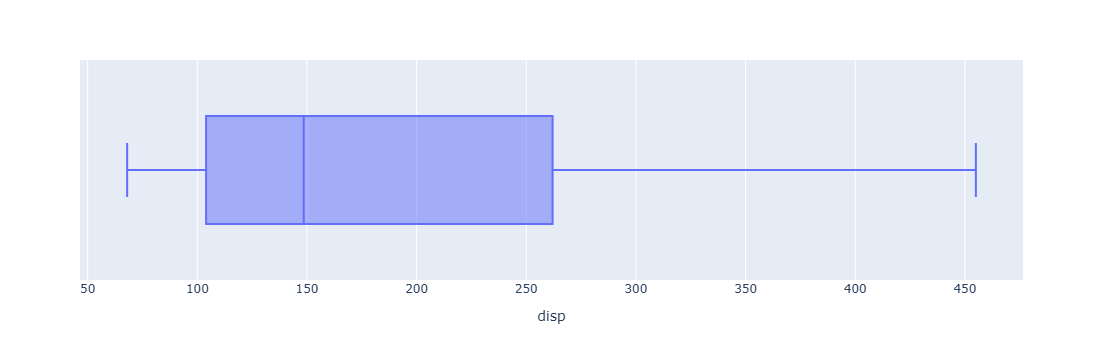

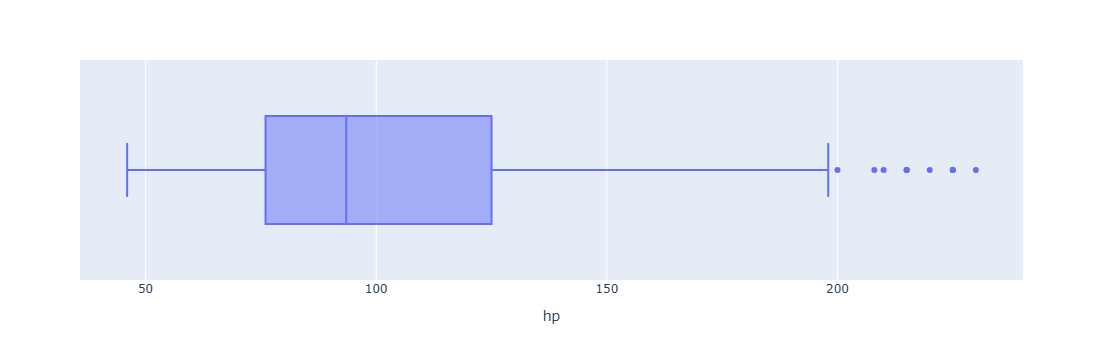

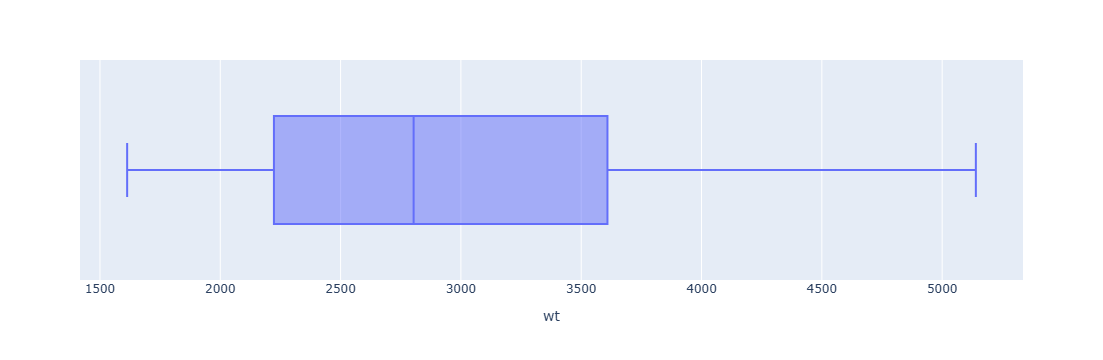

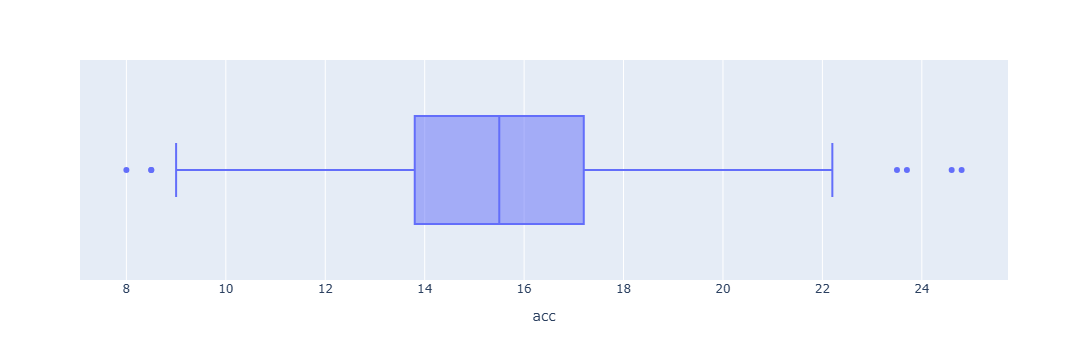

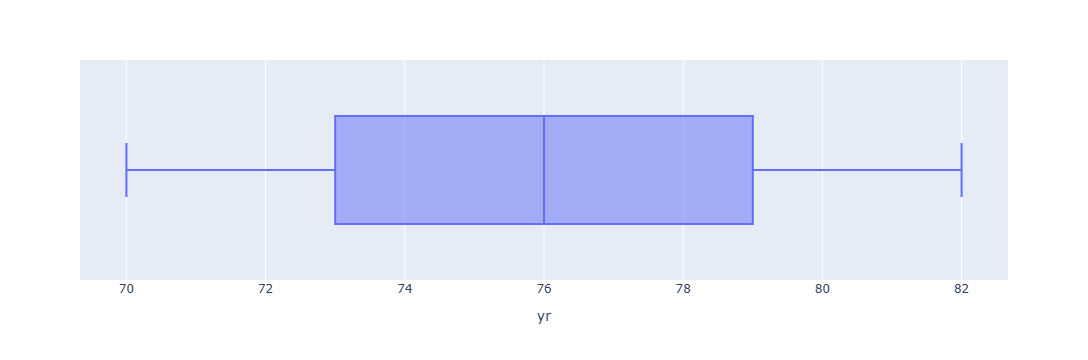

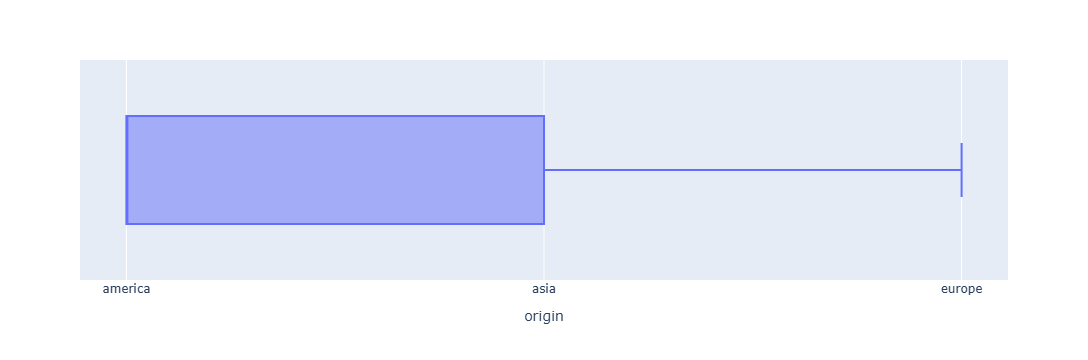

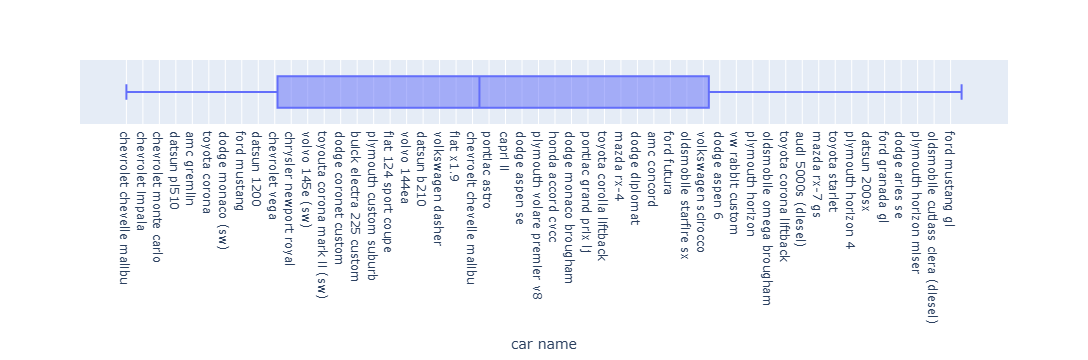

In [24]:
for column in df:
    fig=px.box(df,x=column)
    fig.show()

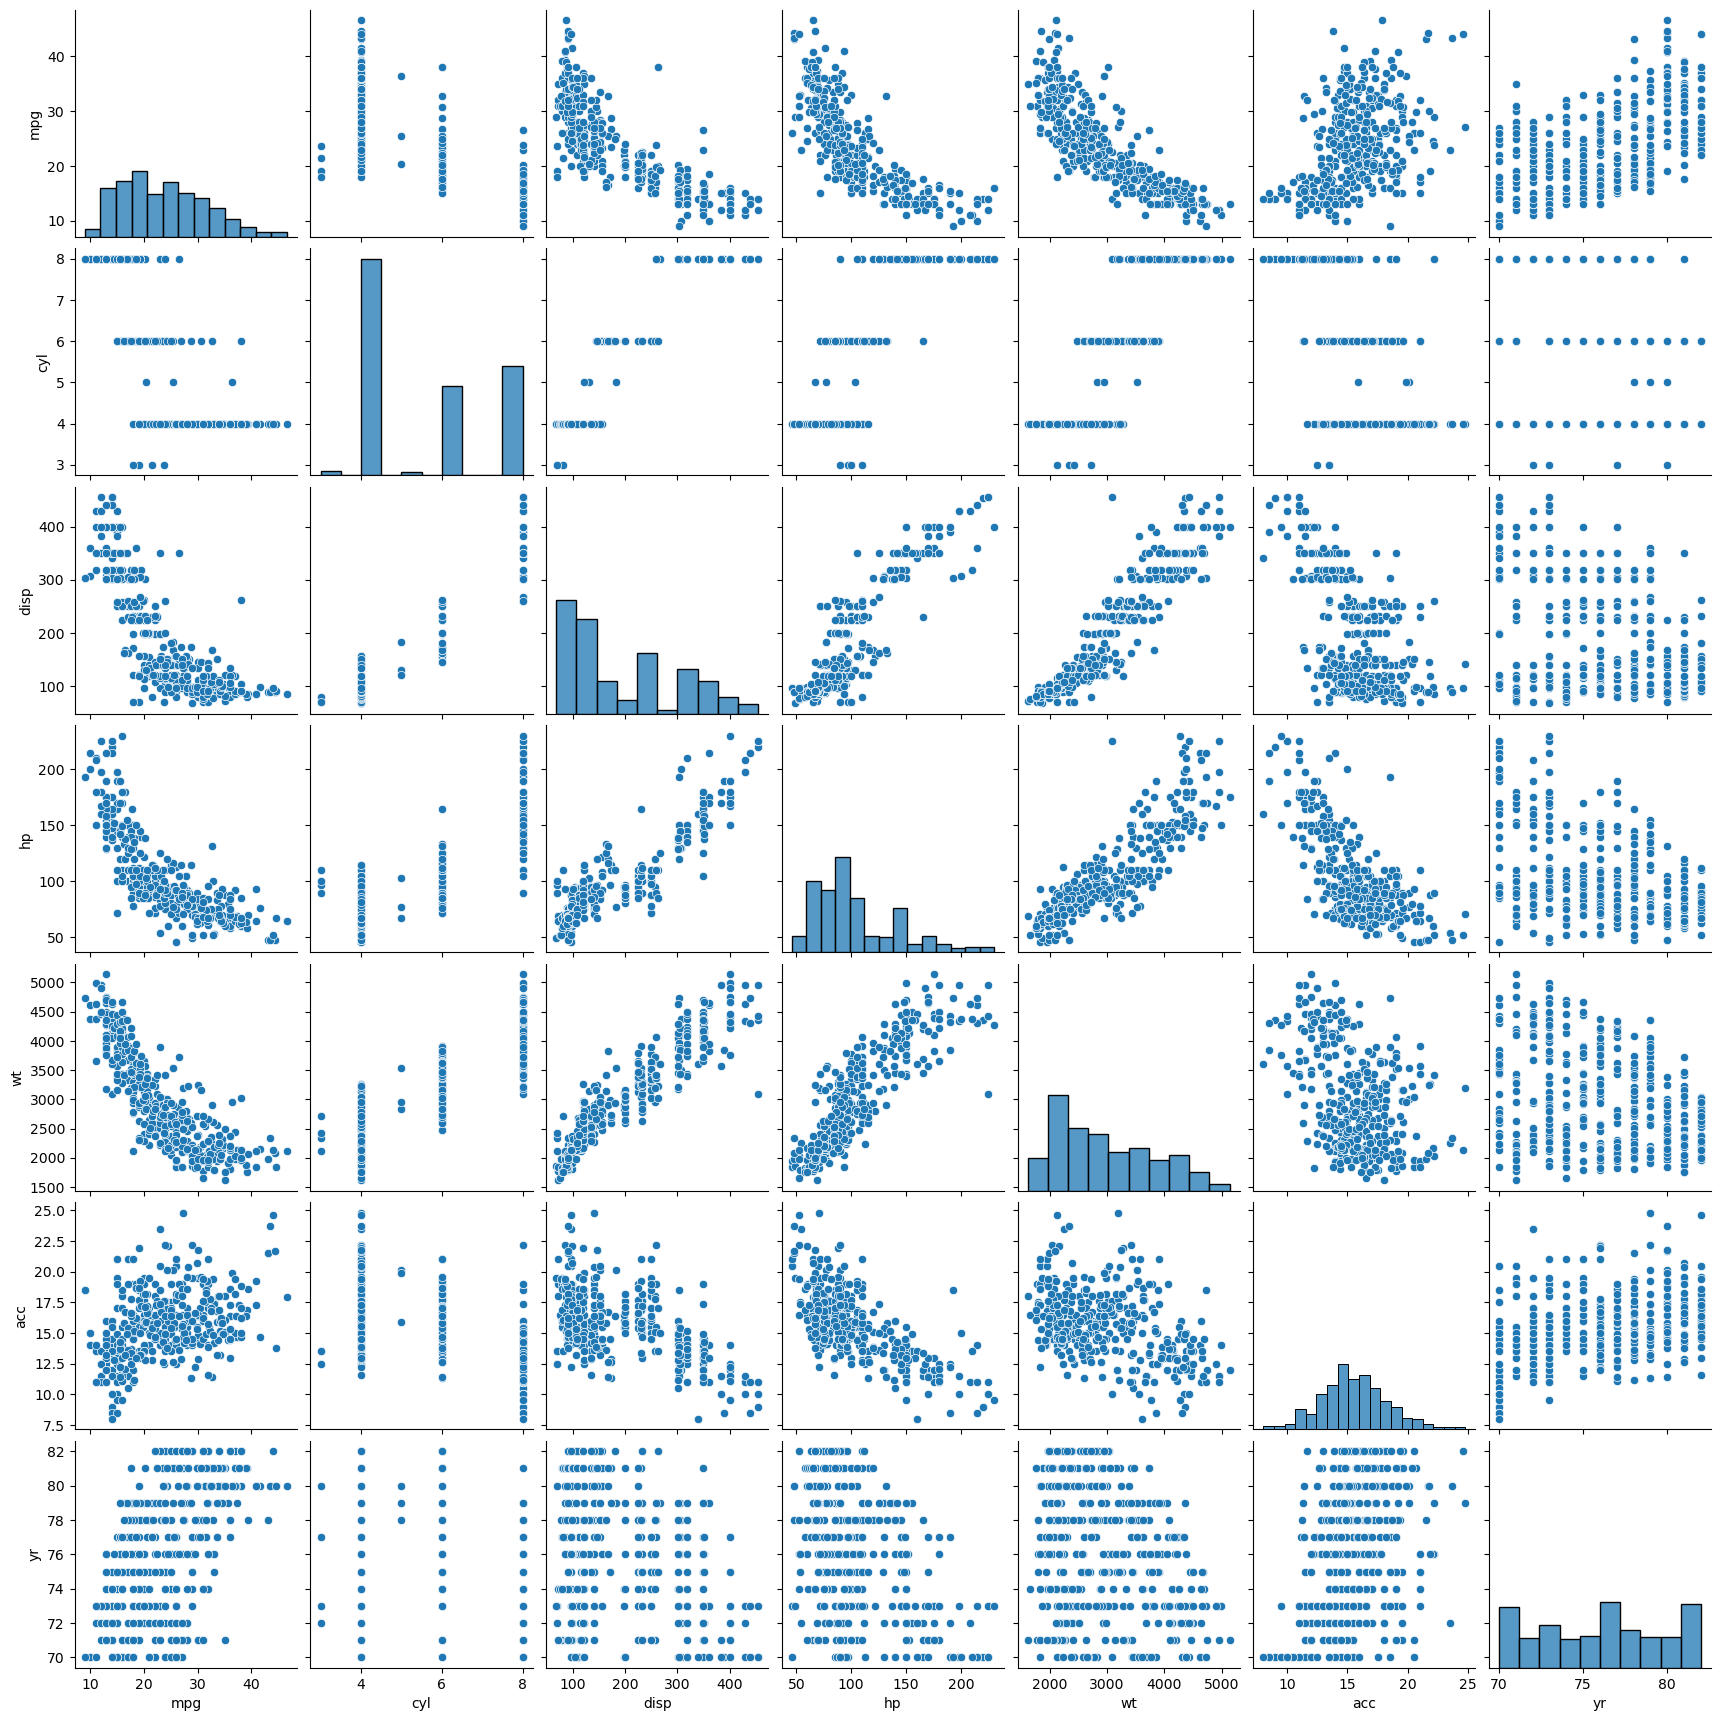

In [25]:
sns.pairplot(df)

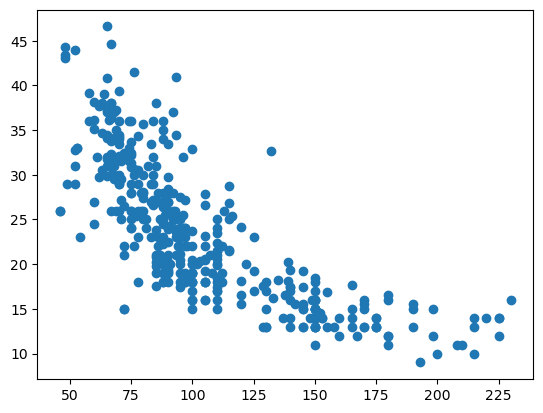

In [26]:
plt.scatter(df["hp"],df["mpg"])

<Axes: xlabel='origin', ylabel='count'>

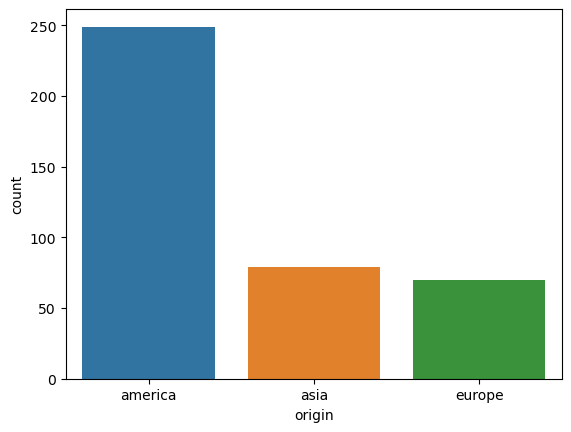

In [27]:
sns.countplot(x="origin",data=df)

<Axes: xlabel='origin', ylabel='mpg'>

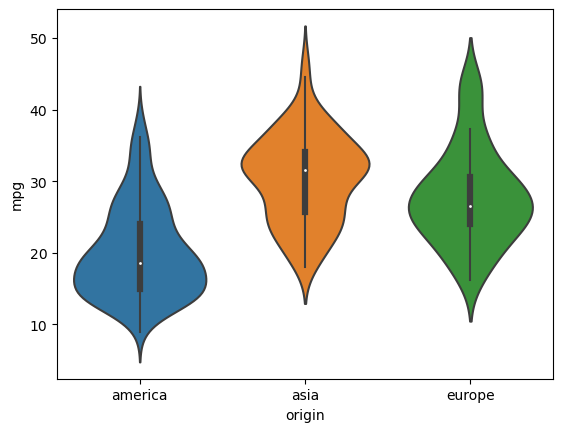

In [28]:
sns.violinplot(x="origin",y="mpg",data=df)

<Axes: xlabel='cyl', ylabel='mpg'>

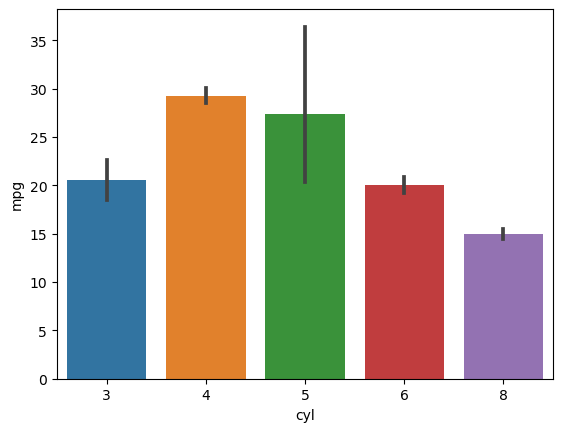

In [29]:
sns.barplot(x="cyl",y="mpg",data=df)

In [ ]:
sns.lineplot(x="yr",y="mpg",data=df)

In [ ]:
sns.jointplot(x="wt",y="mpg",data=df)

In [ ]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

In [ ]:
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

In [ ]:
sns.kdeplot(x="wt", y="mpg", data=df)

In [ ]:
sns.boxenplot(x="origin", y="mpg", data=df)

In [ ]:
g = sns.FacetGrid(col='origin', row='yr',data=df)
g.map(sns.scatterplot, 'cyl', 'acc')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('FacetGrid Plot')
plt.show()

In [ ]:
sns.pairplot(data=df, hue="mpg", diag_kind="kde", palette="husl")